In [1]:
import numpy as np
import matplotlib.pyplot as mpl

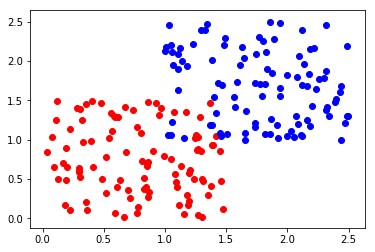

In [40]:
# We create some data
d1 = np.stack(
    [np.random.uniform(high=1.5, low=0, size=100), np.random.uniform(high=1.5, low=0, size=100), np.repeat(1, 100)],
    axis=1)
d2 = np.stack(
    [np.random.uniform(high=2.5, low=1, size=100), np.random.uniform(high=2.5, low=1, size=100), np.repeat(2,100)],
    axis=1)

mpl.scatter(d1[:,0], d1[:,1], c="r")
mpl.scatter(d2[:,0], d2[:,1], c="b")
mpl.show()

In [85]:
# We make our function
def knn(dataset, query, k=3):
    # Get distances
    dist = np.sqrt(np.sum((dataset[:,:-1] - query) ** 2, axis=1))
    
    # Sort distances and get indexes (increasing order)
    index = np.argsort(dist)

    # Get the K first points
    nearest = dataset[index[:k]]
    
    # Get classes
    classes = np.unique(dataset[:,-1])
    count = [ sum(nearest[:,-1] == i) for i in classes ]
    
    # Get maximum
    idx = np.argmax(count)
    
    # Return class
    print("Class: ", classes[idx])
    
knn(np.concatenate([d1, d2]), [2.5, 0.5])

Class:  2.0
